In [25]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [26]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [27]:
train_images = train_images.astype('float32') / 255.0
test_images =test_images.astype('float32') / 255.0

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

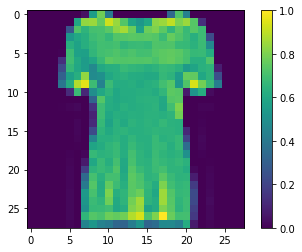

In [29]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

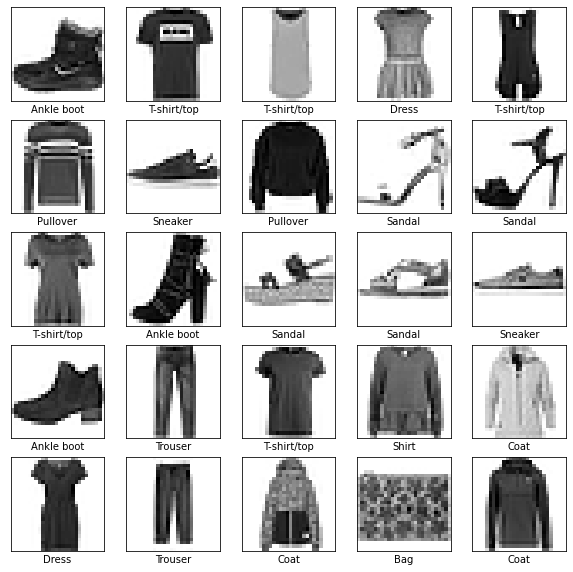

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [31]:
val_images, train_images= train_images[:3000], train_images[3000:] 
val_labels, train_labels = train_labels[:3000], train_labels[3000:]

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
history = model.fit(train_images
                    ,train_labels
                    ,epochs=10
                    ,batch_size=512
                    ,validation_data=(val_images,val_labels)
                                                                                                                              
                   )

Epoch 1/10
112/112 [==============================] - 1s 5ms/step - loss: 1.0692 - accuracy: 0.6588 - val_loss: 0.4844 - val_accuracy: 0.8360
Epoch 2/10
112/112 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.8389 - val_loss: 0.4286 - val_accuracy: 0.8527
Epoch 3/10
112/112 [==============================] - 0s 3ms/step - loss: 0.4005 - accuracy: 0.8591 - val_loss: 0.3986 - val_accuracy: 0.8643
Epoch 4/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.8654 - val_loss: 0.3766 - val_accuracy: 0.8667
Epoch 5/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3553 - accuracy: 0.8755 - val_loss: 0.3545 - val_accuracy: 0.8750
Epoch 6/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3253 - accuracy: 0.8820 - val_loss: 0.3900 - val_accuracy: 0.8510
Epoch 7/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.8829 - val_loss: 0.3451 - val_accuracy: 0.8747
Epoch 

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3490 - accuracy: 0.8725

Test accuracy: 0.8725000023841858


In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

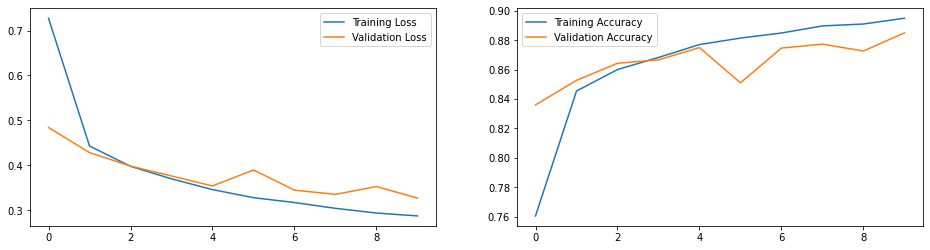

In [40]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [42]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3490 - accuracy: 0.8725
0.3489769399166107
0.8725000023841858


In [43]:
predictions = model.predict(test_images)

In [44]:
print(predictions)

[[ -4.6813474   -7.59978     -5.3926997  ...   4.069535    -2.0444384
    7.620174  ]
 [  0.6336219   -6.41295     10.10697    ... -14.902546    -1.0535825
  -16.294512  ]
 [  1.3722131   12.9027      -1.411634   ...  -7.6153464   -3.6483495
   -9.966537  ]
 ...
 [  2.7306666   -7.578311     0.10017911 ...  -6.3350925    7.4790554
   -9.925011  ]
 [ -1.4893358   10.207308    -2.0657525  ...  -5.3832335   -4.0533857
   -4.5488734 ]
 [ -2.5037642   -5.5961514   -2.513715   ...   2.0026004    0.67412686
   -1.8602432 ]]


In [45]:
import numpy as np

print(np.argmax(predictions[0]))

9


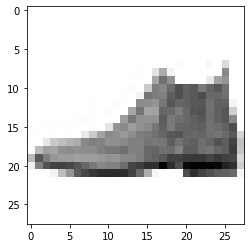

In [46]:
plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.show()

In [47]:
pred_classes = np.argmax(model.predict(train_images), axis=-1)
pred_classes

array([6, 3, 2, ..., 3, 0, 5])

In [48]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[4925,    1,   40,   83,   22,    1,  616,    0,   30,    0],
       [  17, 5556,    1,   85,    7,    0,    9,    0,    4,    0],
       [  82,    2, 4378,   38,  696,    1,  497,    0,   16,    0],
       [ 167,   24,   23, 5049,  298,    2,  118,    0,    7,    0],
       [  14,    5,  235,   75, 5038,    0,  320,    0,    9,    1],
       [   2,    0,    1,    2,    0, 5471,    0,  138,   10,   76],
       [ 595,    5,  258,   77,  419,    0, 4306,    0,   42,    0],
       [   0,    0,    0,    0,    0,   39,    0, 5359,    7,  283],
       [  17,    2,   11,    6,   25,    5,   29,   13, 5604,    1],
       [   0,    0,    0,    0,    0,   11,    0,   87,    1, 5606]],
      dtype=int32)>

In [49]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

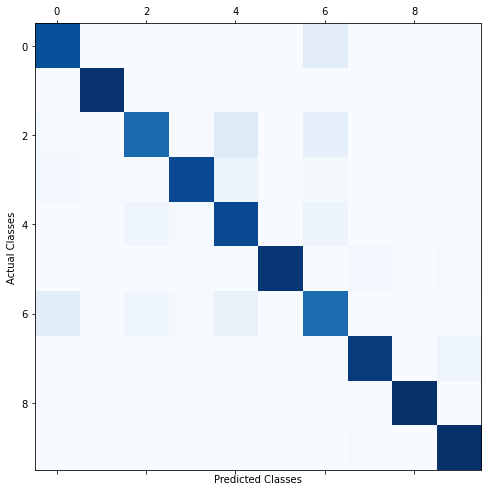

In [50]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()